In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset

mouse_clinical_df = pd.merge(clinical_trial_df, mouse_drug_df, how="outer")

# Display the data table for preview

mouse_clinical_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
...,...,...,...,...,...
1901,m601,25,33.118756,1,Capomulin
1902,m601,30,31.758275,1,Capomulin
1903,m601,35,30.834357,1,Capomulin
1904,m601,40,31.378045,1,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume = mouse_clinical_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"]
ave_vol = mean_tumor_volume.mean()
# Convert to DataFrame
mean_tumor_volume_df = pd.DataFrame(ave_vol.reset_index())
# Preview DataFrame
mean_tumor_volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
mean_tumor_volume = mouse_clinical_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"]
sem_vol = mean_tumor_volume.sem()
# Convert to DataFrame
sem_tumor_volume_df = pd.DataFrame(sem_vol.reset_index())
# Preview DataFrame

sem_tumor_volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
reformatted_df = mean_tumor_volume_df.pivot_table(index="Timepoint", columns='Drug', values='Tumor Volume (mm3)')
# Preview that Reformatting worked
reformatted_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [15]:
sem_c = reformatted_df["Capomulin"].sem()
sem_i = reformatted_df["Infubinol"].sem()
sem_k = reformatted_df["Ketapril"].sem()
sem_p = reformatted_df["Placebo"].sem()

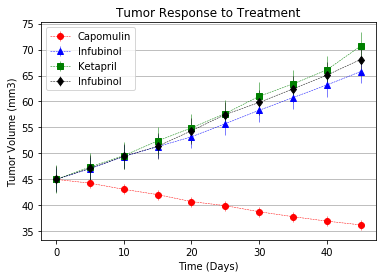

In [21]:
# Generate the Plot (with Error Bars)
index = list(reformatted_df.index)
index

x_axis = index

capomulin = plt.errorbar(x_axis, reformatted_df["Capomulin"] , yerr=sem_c ,  fmt="o", color="red", linestyle='--', linewidth=.5, label="Capomulin")
infubinol = plt.errorbar(x_axis, reformatted_df["Infubinol"], yerr=sem_i ,  fmt="^", color="blue", linestyle='--', linewidth=.5, label="Infubinol")
ketapril = plt.errorbar(x_axis, reformatted_df["Ketapril"], yerr=sem_k ,  fmt="s", color="green", linestyle='--', linewidth=.5, label="Ketapril")
placebo = plt.errorbar(x_axis, reformatted_df["Placebo"], yerr=sem_p , fmt="d", color="black", linestyle='--', linewidth=.5, label="Infubinol")

plt.legend(handles=[capomulin, infubinol, ketapril, placebo], loc="best")

plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")

ax = plt.axes()
ax.yaxis.grid()

# Save the Figure
plt.savefig("../Pymaceuticals/tumor_response.png")
plt.show()


## Metastatic Response to Treatment

In [22]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_tumor_volume_meta = mouse_clinical_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"]
ave_vol_meta = mean_tumor_volume_meta.mean()
# Convert to DataFrame
mean_tumor_volume_meta_df = pd.DataFrame(ave_vol_meta.reset_index())
# Preview DataFrame
mean_tumor_volume_meta_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [23]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_vol_meta = mean_tumor_volume_meta.sem()
# Convert to DataFrame
sem_tumor_volume_meta_df = pd.DataFrame(sem_vol_meta.reset_index())
# Preview DataFrame

sem_tumor_volume_meta_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [29]:
# Minor Data Munging to Re-Format the Data Frames
reformatted_meta_df = mean_tumor_volume_meta_df.pivot_table(index="Timepoint", columns='Drug', values='Metastatic Sites')
# Preview that Reformatting worked
reformatted_meta_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [30]:
sem_meta_c = reformatted_meta_df["Capomulin"].sem()
sem_meta_c = reformatted_meta_df["Infubinol"].sem()
sem_meta_k = reformatted_meta_df["Ketapril"].sem()
sem_meta_p = reformatted_meta_df["Placebo"].sem()

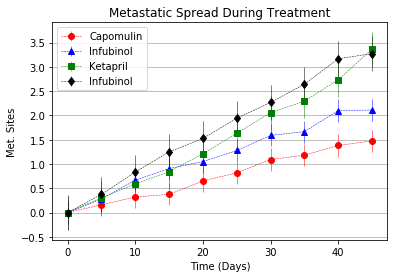

In [31]:
# Generate the Plot (with Error Bars)
index_meta = list(reformatted_meta_df.index)
index_meta

x_axis_meta = index_meta

capomulin_meta = plt.errorbar(x_axis_meta, reformatted_meta_df["Capomulin"], yerr=sem_meta_c, marker="o",color="red", linestyle='--', linewidth=.5, label="Capomulin")
infubinol_meta = plt.errorbar(x_axis_meta, reformatted_meta_df["Infubinol"], yerr=sem_meta_c, marker="^", color="blue", linestyle='--', linewidth=.5, label="Infubinol")
ketapril_meta = plt.errorbar(x_axis_meta, reformatted_meta_df["Ketapril"], yerr=sem_meta_k, marker="s", color="green", linestyle='--', linewidth=.5, label="Ketapril")
placebo_meta = plt.errorbar(x_axis_meta, reformatted_meta_df["Placebo"], yerr=sem_meta_p, marker="d", color="black", linestyle='--', linewidth=.5, label="Infubinol")

plt.legend(handles=[capomulin_meta, infubinol_meta, ketapril_meta, placebo_meta], loc="best")

plt.xlabel("Time (Days)")
plt.ylabel("Met. Sites")
plt.title("Metastatic Spread During Treatment")

ax = plt.axes()
ax.yaxis.grid()

# Save the Figure
plt.savefig("../Pymaceuticals/metastatic_spread.png")
plt.show()


## Survival Rates

In [39]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = mouse_clinical_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].count()

# Convert to DataFrame
mice_count_df = pd.DataFrame(mice_count.reset_index())
mice_count_df = mice_count_df.rename(columns={'Tumor Volume (mm3)':'Mouse Count'})

# Preview DataFrame
mice_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [42]:
# Minor Data Munging to Re-Format the Data Frames
reformatted_count_df = mice_count_df.pivot_table(index="Timepoint", columns='Drug', values='Mouse Count')

# Preview the Data Frame
reformatted_count_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


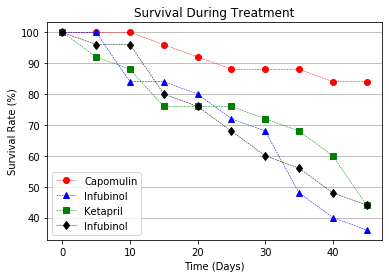

In [50]:
# Generate the Plot (Accounting for percentages)
index_count = list(reformatted_count_df.index)
index_count

x_axis_count = index_count

cap_y = reformatted_count_df["Capomulin"] / reformatted_count_df["Capomulin"][0] * 100
inf_y = reformatted_count_df["Infubinol"] / reformatted_count_df["Infubinol"][0] * 100
ket_y = reformatted_count_df["Ketapril"] / reformatted_count_df["Ketapril"][0] * 100
plac_y = reformatted_count_df["Placebo"] / reformatted_count_df["Placebo"][0] * 100

capomulin_count, = plt.plot(x_axis_count, cap_y, marker="o",color="red", linestyle='--', linewidth=.5, label="Capomulin")
infubinol_count, = plt.plot(x_axis_count, inf_y, marker="^", color="blue", linestyle='--', linewidth=.5, label="Infubinol")
ketapril_count, = plt.plot(x_axis_count, ket_y, marker="s", color="green", linestyle='--', linewidth=.5, label="Ketapril")
placebo_count, = plt.plot(x_axis_count, plac_y, marker="d", color="black", linestyle='--', linewidth=.5, label="Infubinol")

plt.legend(handles=[capomulin_count, infubinol_count, ketapril_count, placebo_count], loc="best")

plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.title("Survival During Treatment")

ax = plt.axes()
ax.yaxis.grid()

# Save the Figure
plt.savefig("../Pymaceuticals/survival.png")
plt.show()

## Summary Bar Graph

In [72]:
# Calculate the percent changes for each drug
percent_change = []
columns = list(reformatted_df.columns.values)

for drug in columns:
    perc_ch = ((reformatted_df.iloc[-1, reformatted_df.columns.get_loc(drug)] - reformatted_df.iloc[0, reformatted_df.columns.get_loc(drug)]) / reformatted_df.iloc[0, reformatted_df.columns.get_loc(drug)]) * 100 
    percent_change.append(perc_ch)


# Display the data to confirm
percent_change_df = pd.DataFrame({
    "Drug" : columns,
    "Percent Change" : percent_change
})

percent_change_df

,Drug,Percent Change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


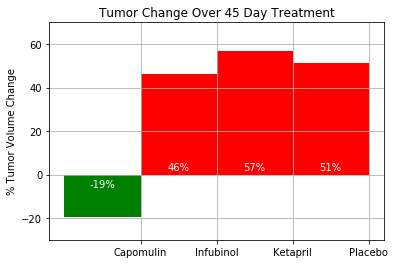

In [239]:
# Store all Relevant Percent Changes into a Tuple

capomulin_rel = percent_change_df.loc[percent_change_df.index[0], "Percent Change"]
infubinol_rel = percent_change_df.loc[percent_change_df.index[2], "Percent Change"]
ketapril_rel = percent_change_df.loc[percent_change_df.index[3], "Percent Change"]
placebo_rel = percent_change_df.loc[percent_change_df.index[5], "Percent Change"]

drug_name = ("Capomulin", "Infubinol", "Ketapril", "Placebo")
rel_perc_change = (capomulin_rel, infubinol_rel, ketapril_rel, placebo_rel)

# Splice the data between passing and failing drugs
rel_df = pd.DataFrame(rel_perc_change, drug_name, columns=["Percent Change"])

rel_df['passing'] = rel_df['Percent Change'] < 0

# Orient widths. Add labels, tick marks, etc. 
fig, ax = plt.subplots()

x_axis = np.arange(len(drug_name))

rects = ax.bar(x_axis, rel_perc_change, color=rel_df.passing.map({True: 'g', False: 'r'}), width=-1, align='edge')

tick_locations = [value for value in x_axis]
ax.set_xticks(tick_locations)
ax.set_xticklabels(drug_name)
ax.set_yticks(np.arange(-20, 80, step=20))
ax.set_ylim(-30, 70)

ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_ylabel("% Tumor Volume Change")
ax.grid()

# Use functions to label the percentages of changes

def autolabel(rects):
    
    for rect in ax.patches:
        y_value = rect.get_height() 
        x_value = rect.get_x() + rect.get_width() / 2
        label = "{:.2%}".format(y_value) 
        #'%d' % int(y_value)
        if y_value < 0:
            ax.text(x_value, y_value + 15, '%d' % int(y_value) + "%", ha='center', va='center', color='white')
        elif y_value > 55:
            ax.text(x_value, y_value - 56, '%d' % int(y_value) + "%", ha='center', va='bottom', color='white')
        elif y_value > 50:
            ax.text(x_value, y_value - 50, '%d' % int(y_value) + "%", ha='center', va='bottom', color='white')
        else:
            ax.text(x_value, y_value - 45, '%d' % int(y_value) + "%", ha='center', va='bottom', color='white')


# Call functions to implement the function calls

autolabel(rects)

# Save the Figure
plt.savefig("../Pymaceuticals/tumor_change.png")

# Show the Figure
fig.show()
